# SAES for Multiobjective Optimization algorithms Bayesian Benchmarking

This notebook provides an example of how to use the Bayesian Posterior SAES modeule. As case study, we will use the data of the paper "[On the automatic design of multi-objective particle swarm optimizers: experimentation and analysis](https://doi.org/10.1007/s11721-023-00227-2)", published in Swarm Intelligence in 2023. In this paper, a comparative study of multi-objective particle swarm optimizers (MOPSO) is conducted, where four of MOPSO variants are compared with algorithms NSGAII, SMPSO and OMOPSO. The computed metrics for performace assessment are six multi-objective quality indicators: EP (additive epsilon), GD (generational distance), SP (spacing), HV (hypervolume), NHV (normalized hypervolume), IGD (inverted generational distance) and IGD+ (inverted generational distance plus). All theses metrics are intended to be minimized but the HV.  

To use SAES, two files CSV files with the following contents are required:
- Metric names and whether they have to be maximized or not
- Experiment data: algorithm, instance, MetricName, executionID, and MetricValue

We use the files called `multiobjectiveMetrics.csv` and `swarmIntelligence.csv` in this example, and we will use them to illustrate the Bayesian Posterior modeule features.

## Load the Data

In [ ]:
from SAES.plots.pplot import Pplot
import pandas as pd
import os

In [3]:
# Load the experiment data
experimentData = pd.read_csv('swarmIntelligence.csv')
experimentData

,Algorithm,Instance,MetricName,ExecutionId,MetricValue
0,NSGAII,ZDT1,EP,0,0.020829
1,NSGAII,ZDT1,EP,1,0.021411
2,NSGAII,ZDT1,EP,2,0.020636
3,NSGAII,ZDT1,EP,3,0.023344
4,NSGAII,ZDT1,EP,4,0.025894
...,...,...,...,...,...
14695,AutoMOPSOZ,DTLZ7,IGD+,20,0.001598
14696,AutoMOPSOZ,DTLZ7,IGD+,21,0.001605
14697,AutoMOPSOZ,DTLZ7,IGD+,22,0.001601
14698,AutoMOPSOZ,DTLZ7,IGD+,23,0.001596


In [4]:
# Compared algoritms
algorithms = experimentData.Algorithm
list(algorithms.unique())

['NSGAII',
 'SMPSO',
 'OMOPSO',
 'AutoMOPSOD',
 'AutoMOPSOW',
 'AutoMOPSORE',
 'AutoMOPSOZ']

In [5]:
experimentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14700 entries, 0 to 14699
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Algorithm    14700 non-null  object 
 1   Instance     14700 non-null  object 
 2   MetricName   14700 non-null  object 
 3   ExecutionId  14700 non-null  int64  
 4   MetricValue  14700 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 574.3+ KB


In [6]:
experimentData

,Algorithm,Instance,MetricName,ExecutionId,MetricValue
0,NSGAII,ZDT1,EP,0,0.020829
1,NSGAII,ZDT1,EP,1,0.021411
2,NSGAII,ZDT1,EP,2,0.020636
3,NSGAII,ZDT1,EP,3,0.023344
4,NSGAII,ZDT1,EP,4,0.025894
...,...,...,...,...,...
14695,AutoMOPSOZ,DTLZ7,IGD+,20,0.001598
14696,AutoMOPSOZ,DTLZ7,IGD+,21,0.001605
14697,AutoMOPSOZ,DTLZ7,IGD+,22,0.001601
14698,AutoMOPSOZ,DTLZ7,IGD+,23,0.001596


In [7]:
# Load the metrics (quality indicators) data
metrics = pd.read_csv('multiobjectiveMetrics.csv')
metrics

,MetricName,Maximize
0,EP,False
1,SP,False
2,GD,False
3,HV,True
4,NHV,False
5,IGD,False
6,IGD+,False


In [8]:
metric = "HV"
pivot = "NSGAII"
sign = Pplot(experimentData, metrics, metric, bayesian_test="sign")
rank = Pplot(experimentData, metrics, metric, bayesian_test="rank")

## Bayesian Posterior Plot

The graph is a **ternary plot**, which is used to visualize probabilistic comparisons among three categories. In the context of Bayesian statistical tests, ternary plots are often employed to compare the relative performance of two competing algorithms while also accounting for the possibility of no significant difference.

Each point in the ternary plot represents a comparison outcome from a statistical test, where:

- One axis represents the probability that **Algorithm A is better**.
- Another axis represents the probability that **Algorithm B is better**.
- The third axis represents the probability that **there is no meaningful difference** between the two.

The color intensity in the graph typically represents the density of points, indicating how often different probability distributions occur.

### Bayesian Sign Test
- The Bayesian Sign Test is a **simpler** statistical method that assesses the probability that one algorithm is better than another based on direct pairwise comparisons.
- It only considers **the direction of differences** (i.e., which algorithm performs better), ignoring the magnitude of the differences.
- It assumes that the comparisons are independent and does not account for the distribution of the differences.

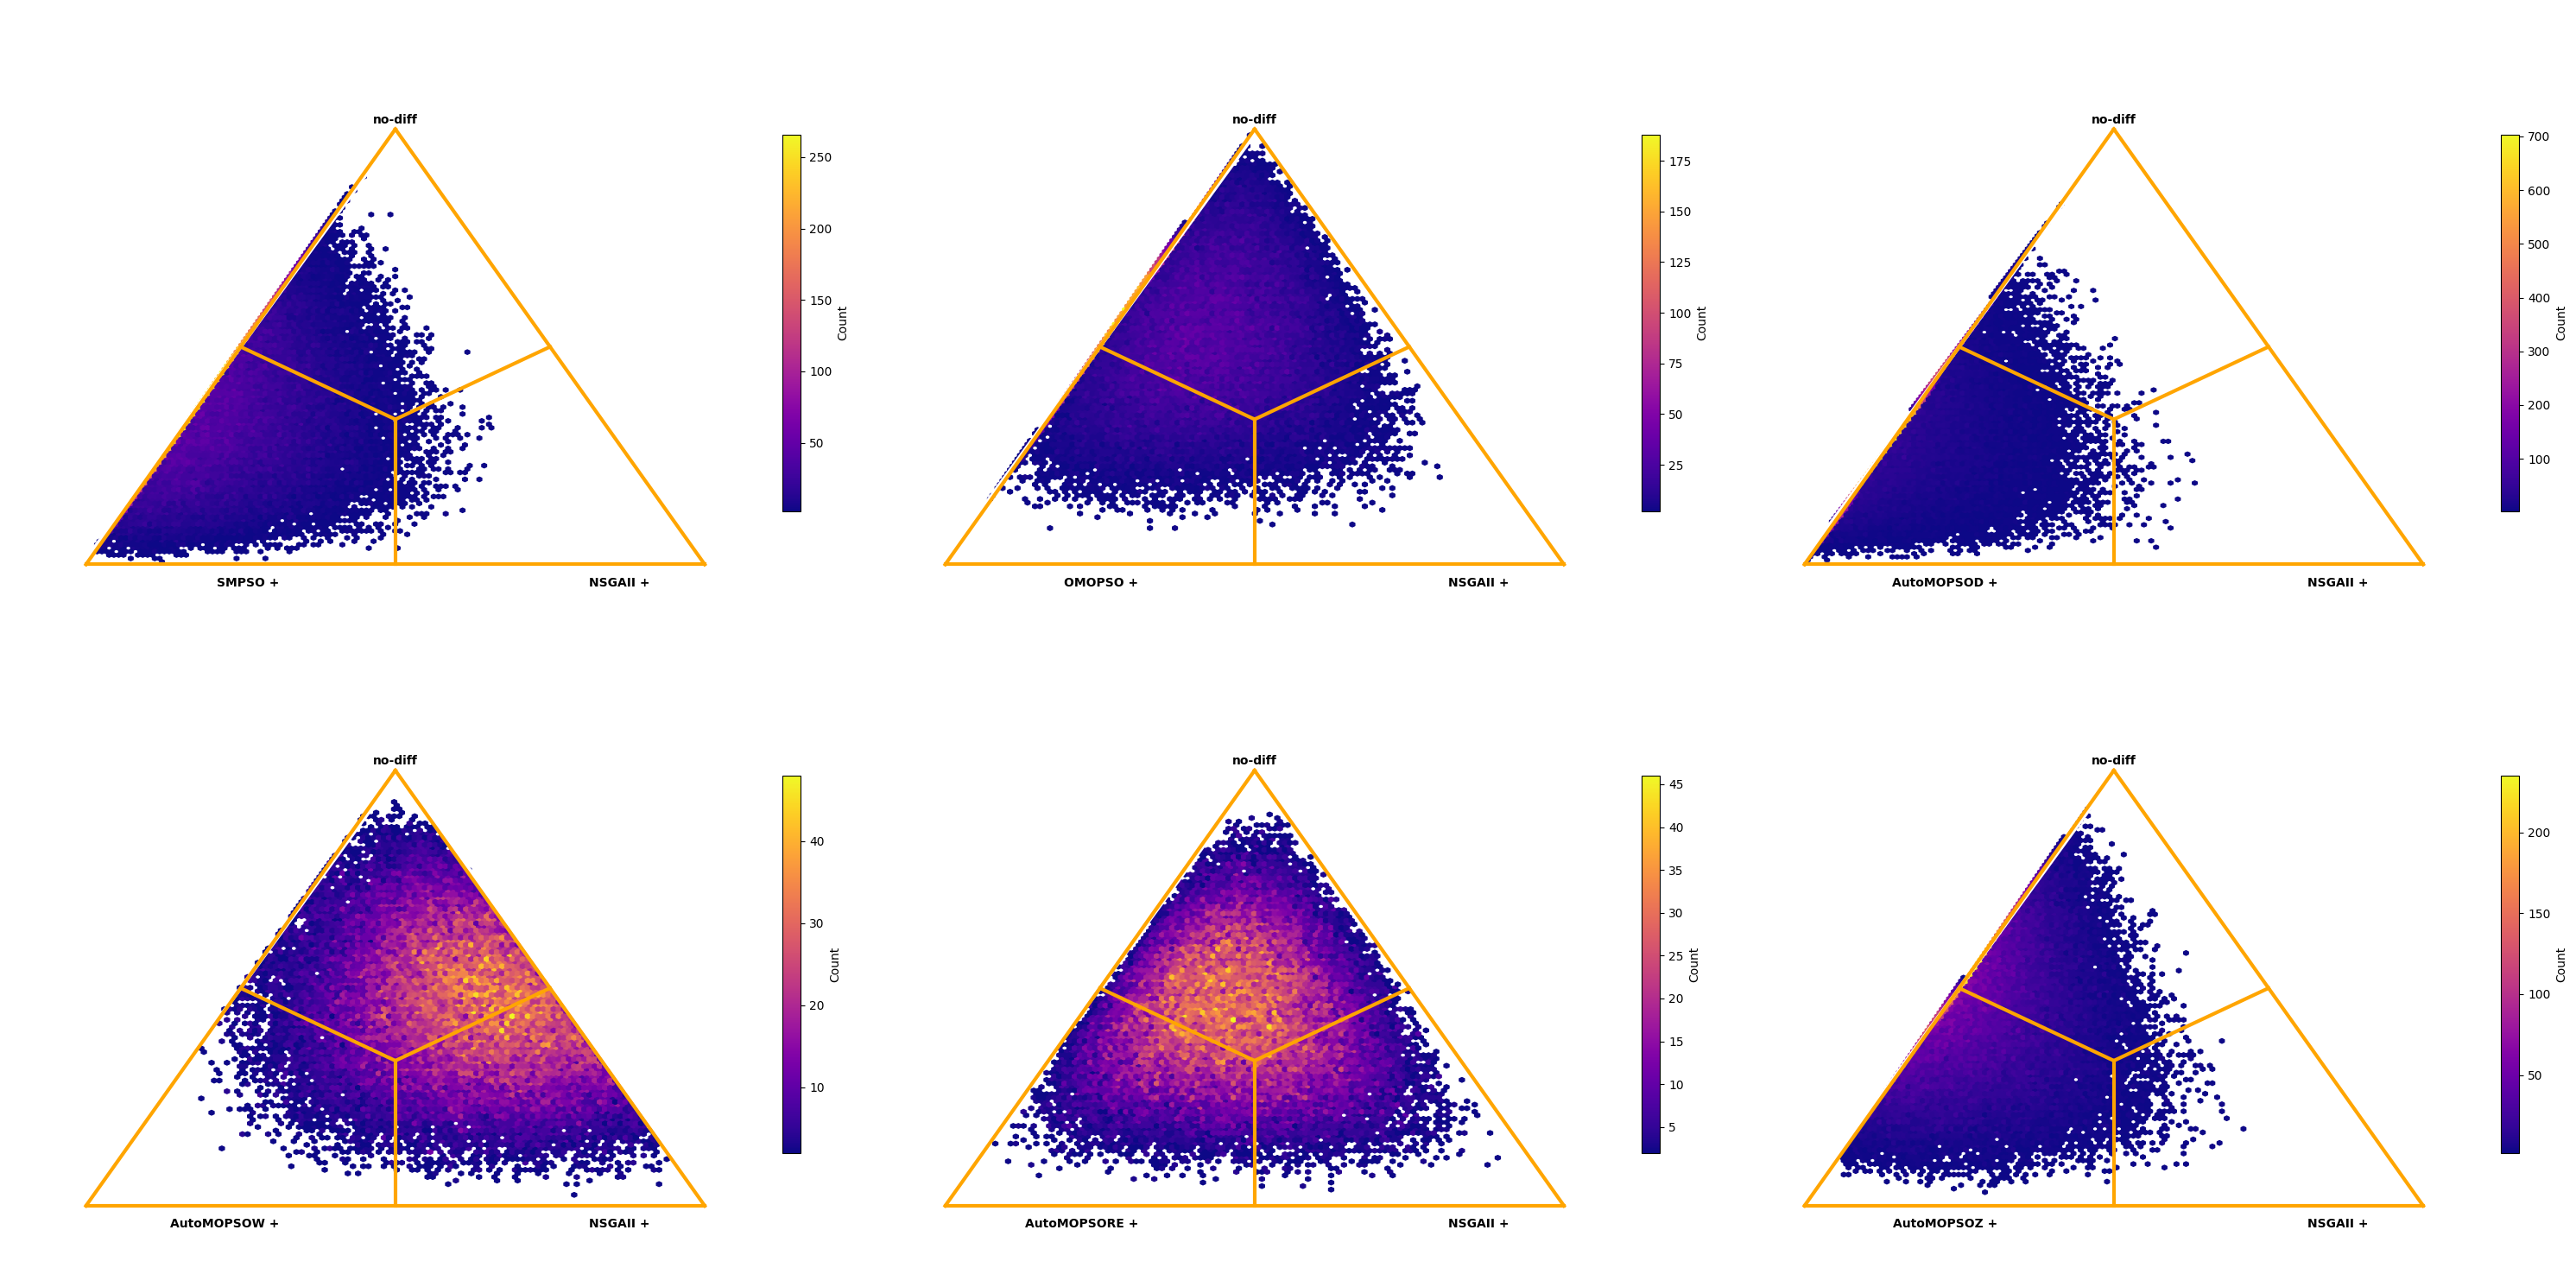

In [9]:
sign.show_pivot(pivot, width=30, heigth=15)

### Bayesian Signed Rank Test
- The Bayesian Signed Rank Test is **more informative** as it takes into account both the **direction and magnitude** of differences between algorithm performances.
- It is based on the **Wilcoxon Signed Rank Test**, which ranks the absolute differences and considers their signs.
- This test provides a more robust estimation of superiority, especially when differences are small or skewed.

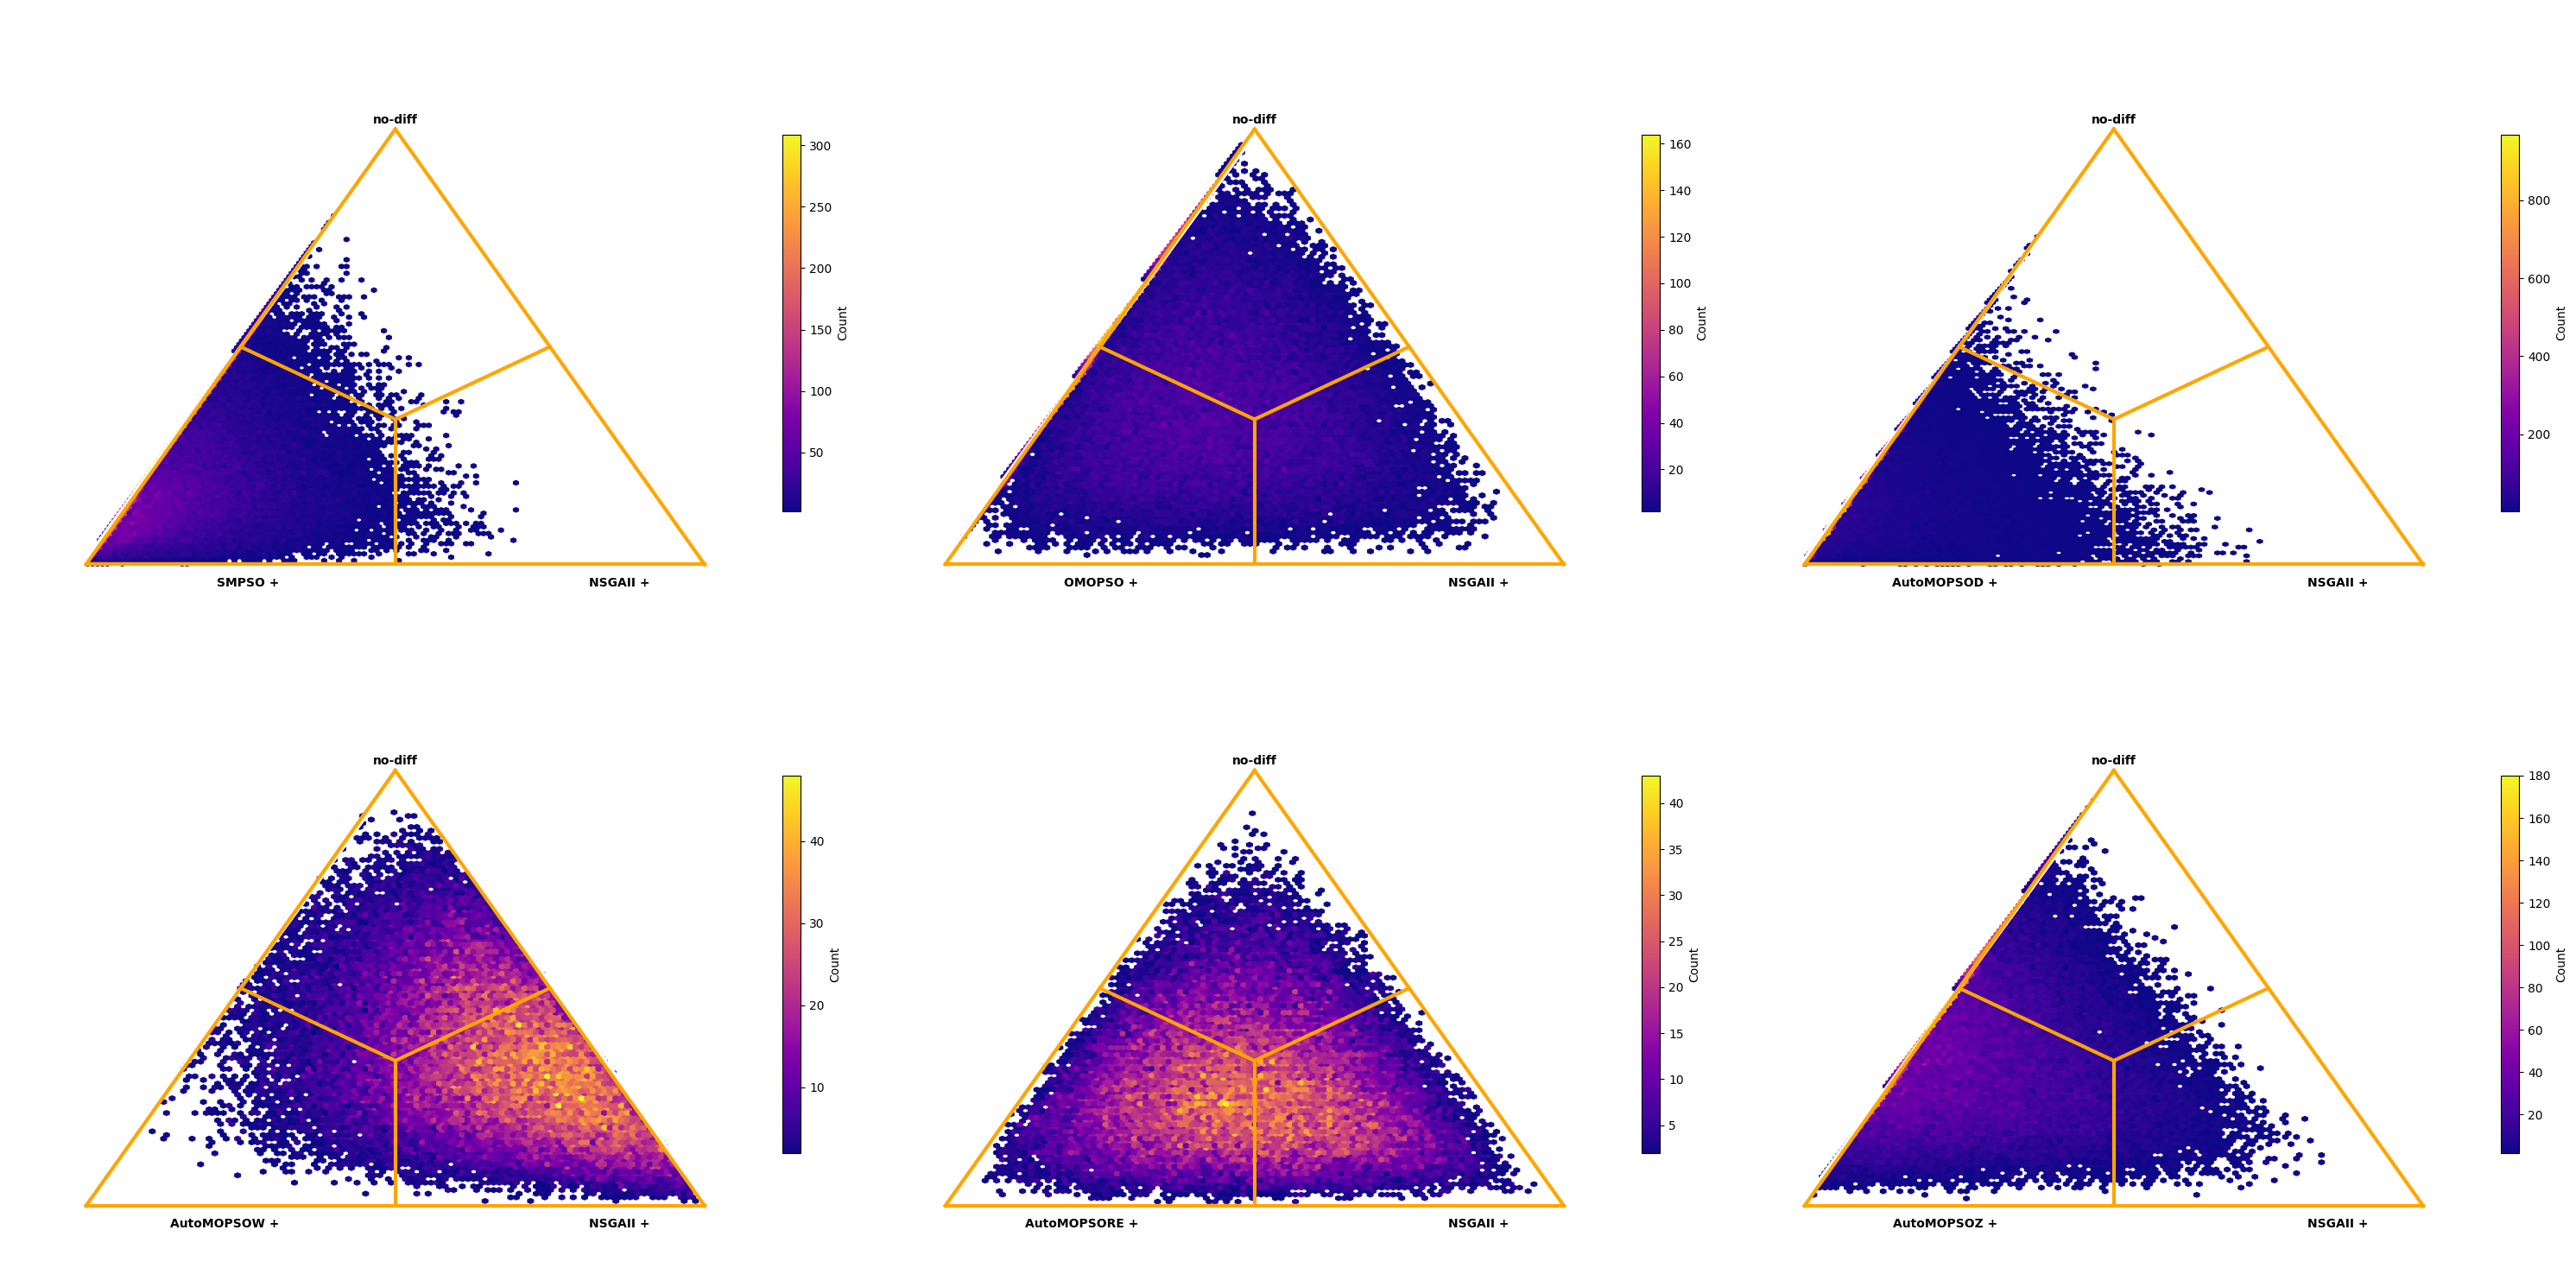

In [10]:
rank.show_pivot(pivot, width=30, heigth=15)

### Key Differences:
| Feature                 | Bayesian Sign Test          | Bayesian Signed Rank Test  |
|-------------------------|----------------------------|----------------------------|
| **Uses difference magnitude?** | ❌ No                        | ✅ Yes                       |
| **Based on ranks?**     | ❌ No                        | ✅ Yes                       |
| **Handles small differences well?** | ❌ No                        | ✅ Yes                       |
| **Assumption on independence** | ✅ Assumes independence      | ✅ Assumes paired data       |

In summary, the **Bayesian Signed Rank Test** provides a more nuanced view by considering not just whether an algorithm is better but also **how much better it is**, making it more suitable for analyzing small differences.

## Alg1 vs Alg2

In the examples above, we have used a feature that allows selecting one algorithm as a pivot and generating one graph per algorithm for comparison. This is very useful for observing the general performance of one algorithm versus the rest. However, the SAES module also offers the option to compare two algorithms individually, which is particularly useful for scientific paper visualization.

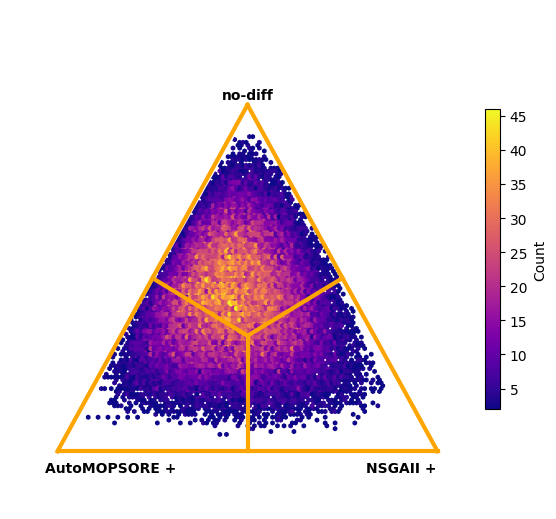

In [11]:
sign.show("NSGAII", "AutoMOPSORE")

Of course, you can also save the resulting plot as a PNG image. You can either choose a name for the image or have one generated automatically.

In [12]:
rank.save("NSGAII", "AutoMOPSORE", output_path=os.getcwd(), file_name="my_bayesian_comparison.png")

[2025-03-13 07:27:25,804] [SAES.plots.Pplot] [INFO] Pplot my_bayesian_comparison.png saved to /home/khaosdev/SAES/notebooks
